In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv(r"C:\Users\kumar\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.drop(['CustomerID'], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

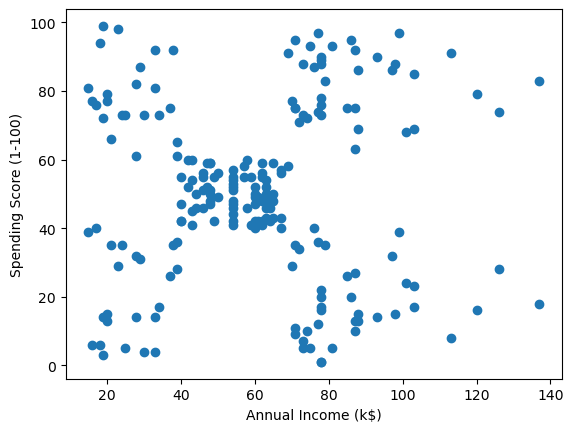

In [ ]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

269981.28
183653.3289473684
106348.37306211119
73880.64496247195
44448.45544793371
40825.16946386947
33642.57922077922
26686.837785187785
24766.47160979344
23103.122085983916


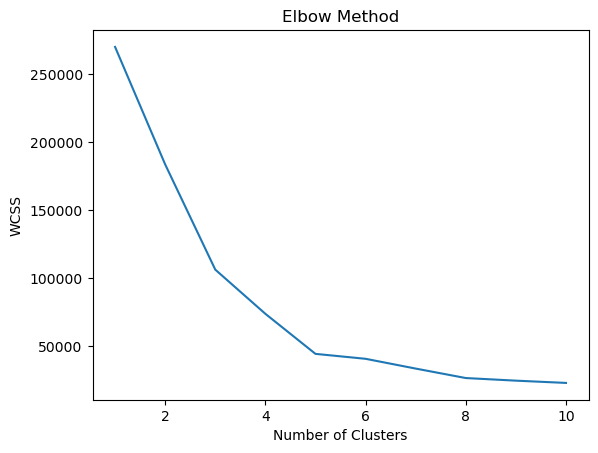

In [ ]:
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)
    print(model.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)

df['label'] = model.predict(X)
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

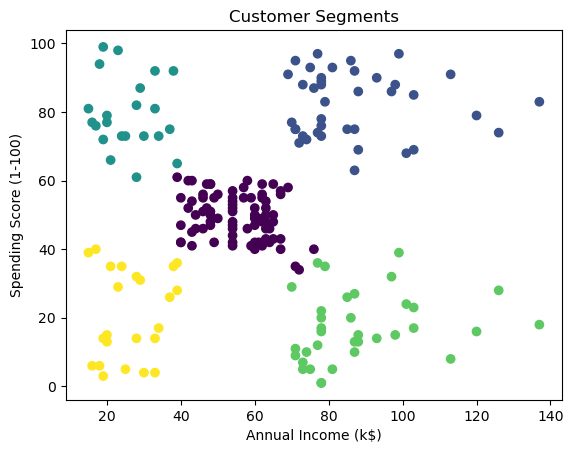

In [ ]:
plt.scatter(X['Annual Income (k$)'], 
            X['Spending Score (1-100)'], 
            c=df['label'])

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()